# Algoritmos Genéticos

**Professor:**
Cristiano Leite de Castro

**Alunos:**
Gabriel Camatta Zanotelli	2018020140
Lucas de Almeida Martins	2018020328

## Introdução

AAA


## Implementação

AAA


### Definições de variáveis iniciais

In [37]:
import random as rd
import matplotlib.pyplot as plt
import string as str

In [69]:
crossover_rate = 0.5
mutation_rate = 0.8

base_population = 20
pop_sample = 5

final_text = 'METHINKS*IT*IS*LIKE*A*WEASEL'
text_size = len(final_text)
space_index = [i for i, letter in enumerate(final_text) if letter == '*']

VALID_CHARS = list(str.ascii_uppercase + str.digits)

fitness_history = []


### Funções de suporte

In [74]:
def argsort(seq):
    return sorted(range(len(seq)), key=seq.__getitem__)

def verify_condition(pupulation):
    return 0 in pupulation

def get_best_solution(population_fit):
    count = 0
    aux = 100
    for i in range(len(population_fit)):
        if population_fit[i] < aux:
            aux = population_fit[i]
            count = i
    return i

def draw_pop(pop):
    for i in range(len(pop)):
        line = ''.format((8-i), ' ')
        for j in range(len(pop)):
            if pop[j] == i:
                line = line + "X "
            else:
                line = line + "- "
        print(line)

def join(vector):
    return "".join(vector)

def check_crossover():
    return rd.random() < crossover_rate

def check_mutation():
    return rd.random() < mutation_rate

def get_valid_id():
    id = -1
    while id in space_index or id == -1:
        id = rd.randint(0, text_size-1)
    return id


### Definição da População Inicial

AAA

In [46]:
def init_population(_mu:int = 20):
    population = []
    for i in range (_mu):
        word = [rd.choice(VALID_CHARS) for _ in range(text_size)]
        for i in space_index:
            word[i] = "*"
        population.append(word)
    return population

### Avaliação de candidatos

AAA

In [47]:
def fitness_nq(solution):
    checks = 0
    for i in range(len(solution)):
        if solution[i] == final_text[i]:
            checks+=1
    return checks

## Seleciona pais

Foi selecionado o método de "Roleta" para a seleção dos pais.


In [58]:
def select_parents_roulete(pupulation, population_fitt):
    parents = [None, None]

    total = sum(population_fitt)
    p1 = rd.randint(1, total)
    p2 = rd.randint(1, total)

    count = 0
    prev = 0
    for i in range(len(pupulation)):
        count += population_fitt[i]
        if (prev < p1 <= count) and parents[0] is None:
            parents[0] = pupulation[i]
        if (prev < p2 <= count) and parents[1] is None:
            parents[1] = pupulation[i]
        prev = count

    return parents

## Recombinação dos pais

Utilização de um método de *Cut and crossfill* variável

In [67]:
def cut_and_crossfill_var(parents):

    c1 = parents[0]
    c2 = parents[1]

    for i in range(len(parents[0])):
        if c1[i] != '*' and check_crossover():
            aux = c1[i]
            c1[i] = c2[i]
            c2[i] = aux

    return [c1, c1]

## Mutação dos filhos

AAA


## Cria e seleciona nova geração

AAA

In [72]:
def mutate_offspring(offspring):
    for of in offspring:
        if check_mutation():
            id1 = get_valid_id()
            id2 = get_valid_id()
            aux = of[id1]
            of[id1] = of[id2]
            of[id2] = aux
    return offspring

In [86]:
def select_new_generation(poulation, offspring):
    new_generation = poulation + offspring

    new_pop_fit = [0] * len(new_generation)
    for i in range(len(new_generation)):
        new_pop_fit[i] = fitness_nq(new_generation[i])

    new_pop_id = argsort(new_pop_fit)[len(offspring):]

    next_generation = []
    for i in range(len(new_generation)):
        if i in new_pop_id:
            next_generation.append(new_generation[i])

    return next_generation

## Desenha gráfico

AAA

In [61]:
def draw_graph(datax, datay):
    plt.plot(range(datax+1), datay[0], "-g", label="Medium")
    plt.plot(range(datax+1), datay[1], "-r", label="Best")
    plt.legend(loc="upper right")
    plt.xlabel('Generation')
    plt.ylabel('Fittness')
    plt.show()

## Execução

## Resultados

AAA

### Média de Geração para convergência
Falar dos parâmetros escolhidos


### Variação da Probabilidade de Mutação
Rodar umas 10 vezes


### Variação na Probablidade de Cruzamento
Rodar umas 10 vezes

Texto final:  METHINKS*IT*IS*LIKE*A*WEASEL 

Fittness da população inicial:
[5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 5, 5, 7, 6, 6, 5, 5]

População inicial:
60KTJA3N*SP*A8*30F6*I*XMX8V3  -  2IOQVF6I*YX*84*ZJYO*Q*JZHHH9  -   -  WDK1G5WZ*YO*MS*5CX4*Q*YJ91K4  -  8SCXL0RK*W4*Q0*V955*H*FX8UKF
2IOQVF6I*YX*84*ZJYO*Q*JZHHH9  -  WDK1G5WZ*YO*MS*5CX4*Q*YJ91K4  -   -  8SCXL0RK*W4*Q0*V955*H*FX8UKF  -  7GLCGSON*QV*I8*PXU2*9*VK60H7
WDK1G5WZ*YO*MS*5CX4*Q*YJ91K4  -  8SCXL0RK*W4*Q0*V955*H*FX8UKF  -   -  7GLCGSON*QV*I8*PXU2*9*VK60H7  -  XJXVWH7E*QJ*GY*WVLH*W*A29CKH
8SCXL0RK*W4*Q0*V955*H*FX8UKF  -  7GLCGSON*QV*I8*PXU2*9*VK60H7  -   -  XJXVWH7E*QJ*GY*WVLH*W*A29CKH  -  NXPP3U0P*K5*R1*BDZF*0*WBF1O7
7GLCGSON*QV*I8*PXU2*9*VK60H7  -  XJXVWH7E*QJ*GY*WVLH*W*A29CKH  -   -  NXPP3U0P*K5*R1*BDZF*0*WBF1O7  -  0C1CEQLZ*0D*QH*X7AL*2*Q2MSIM


Geração final:  500

Fittness da população final:
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

Melhor indivíduo:
['7', 'S', 'V', '5', 'H', 'F', 'E', 'W', '*', 'I', 

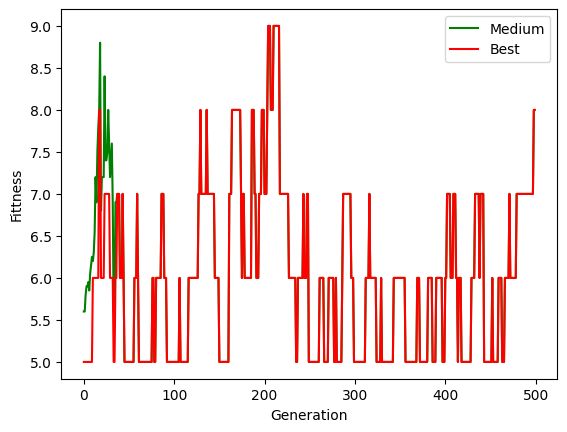

In [88]:
max_generation = 500

print("Texto final: ", final_text, "")
print()

#=================================================================
pupulation = init_population()
population_fitt = [0] * base_population

for i in range(base_population):
    population_fitt[i] = fitness_nq(pupulation[i])
print("Fittness da população inicial:")
print(population_fitt)
print()

print("População inicial:")
for i in range(int(base_population / 4)):
    print(join(pupulation[i]), " - ", join(pupulation[i+1]), " - ",
          " - ", join(pupulation[i+2]), " - ", join(pupulation[i+3]))
print()

#=================================================================
count_gen = 0
datay = [[], []]
for i in range(max_generation):

    parents = select_parents_roulete(pupulation, population_fitt)

    offspring = cut_and_crossfill_var(parents)

    mutate_offspring(offspring)

    pupulation = select_new_generation(pupulation, offspring)

    for j in range(base_population):
        population_fitt[j] = fitness_nq(pupulation[j])

    datay[0].append(sum(population_fitt) / len(population_fitt))
    datay[1].append(min(population_fitt))

    count_gen = i
    if verify_condition(population_fitt):
        break

#=================================================================
print()
print("Geração final: ", (count_gen+1))
print()
print("Fittness da população final:")
print(population_fitt)
print()
print("Melhor indivíduo:")
best_pop = pupulation[get_best_solution(population_fitt)]
print(best_pop)
print()
draw_pop(best_pop)

draw_graph(count_gen, datay)

## Conclusão

Com N = 20 e N = 50 as curvas, depois de 125 e 220 iterações, respectivamente, não apresentaram melhorias, provavelmente porque o programa não apresentou variabilidade suficiente e a configuração final da população é resultado de um pico evolutivo que apresentava soluções melhores no início, mas encontrou uma limitação.

Dessa forma, pôde-se notar a importância de adicionar variabilidade às populações, tanto na forma de mutações mais frequentes, quanto reduzindo a exclusão dos indivíduos menos inaptos, para que o algoritmo consiga chegar na resposta ótima e não fique preso em uma tendência evolutiva.
